#### Predicting Car Brand

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import classification_report
from tensorflow.keras import optimizers

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/Car_data/Train'

test_path = '/content/drive/MyDrive/Datasets/Car_data/Test'

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layers in resnet.layers:
  layers.trainable = False

In [ ]:
folders = glob(train_path+'/*')

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs = resnet.input, outputs = prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
##Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=5, mode='min')

In [ ]:
model.fit(training_set, epochs = 100, validation_data=test_set)

Epoch 1/100
2/2 [==============================] - 58s 2s/step - loss: 3.5279 - accuracy: 0.4219 - val_loss: 8.2273 - val_accuracy: 0.5172
Epoch 2/100
2/2 [==============================] - 2s 1s/step - loss: 10.2957 - accuracy: 0.3125 - val_loss: 3.8506 - val_accuracy: 0.3276
Epoch 3/100
2/2 [==============================] - 2s 990ms/step - loss: 3.8912 - accuracy: 0.3594 - val_loss: 8.3242 - val_accuracy: 0.1552
Epoch 4/100
2/2 [==============================] - 2s 1s/step - loss: 4.7046 - accuracy: 0.3906 - val_loss: 6.2850 - val_accuracy: 0.3276
Epoch 5/100
2/2 [==============================] - 2s 999ms/step - loss: 3.4258 - accuracy: 0.4062 - val_loss: 1.0787 - val_accuracy: 0.5517
Epoch 6/100
2/2 [==============================] - 2s 1s/step - loss: 1.4877 - accuracy: 0.5312 - val_loss: 2.9460 - val_accuracy: 0.5345
Epoch 7/100
2/2 [==============================] - 2s 1s/step - loss: 2.5514 - accuracy: 0.5156 - val_loss: 2.1177 - val_accuracy: 0.3103
Epoch 8/100
2/2 [=========

In [ ]:
loss = pd.DataFrame(model.history.history)

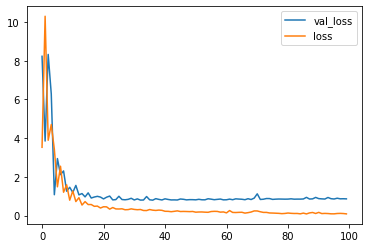

In [ ]:
loss[['val_loss', 'loss']].plot()

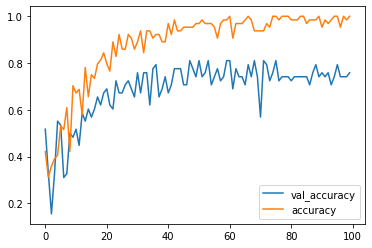

In [ ]:
loss[['val_accuracy', 'accuracy']].plot()

In [ ]:
y_pred = model.predict(test_set)
y_pred_cls=np.argmax(y_pred, axis = 1)
pred_df = pd.DataFrame({'Actual':test_set.labels, 'Prediction':y_pred_cls})
pred_df

,Actual,Prediction
0,0,1
1,0,2
2,0,1
3,0,1
4,0,0
5,0,1
6,0,2
7,0,2
8,0,1
9,1,0


In [ ]:
print(classification_report(pred_df['Actual'], pred_df['Prediction']))

              precision    recall  f1-score   support

           0       0.12      0.11      0.12         9
           1       0.45      0.43      0.44        30
           2       0.29      0.32      0.30        19

    accuracy                           0.34        58
   macro avg       0.29      0.29      0.29        58
weighted avg       0.34      0.34      0.34        58



In [ ]:
img_path = '/content/drive/MyDrive/Datasets/Car_data/Test/lamborghini/10.jpg'

In [ ]:
img = image.load_img(img_path, target_size = (224, 224))

In [ ]:
x = image.img_to_array(img)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x = x/255
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
test_set.class_indices

{'audi': 0, 'lamborghini': 1, 'mercedes': 2}

In [ ]:
np.argmax(model.predict(img_data))

2

### Xception

In [ ]:

from tensorflow.keras.applications.xception import Xception

In [ ]:
IMAGE_SIZE = [224,224]

In [ ]:
xcep = Xception(include_top=False, weights = 'imagenet', input_shape=IMAGE_SIZE+[3])

In [ ]:
for layers in xcep.layers:
  layers.trainable = False

In [ ]:
xcep

In [ ]:
x = Flatten()(xcep.output)

In [ ]:
folders

['/content/drive/MyDrive/Datasets/Car_data/Train/audi',
 '/content/drive/MyDrive/Datasets/Car_data/Train/mercedes',
 '/content/drive/MyDrive/Datasets/Car_data/Train/lamborghini']

In [ ]:
predictions = Dense(len(folders),activation = 'softmax') (x)

In [ ]:
model = Model(inputs = xcep.input, outputs = predictions)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
model.fit(training_set, epochs = 100, validation_data=test_set)

Epoch 1/100
2/2 [==============================] - 4s 1s/step - loss: 2.8226 - accuracy: 0.3750 - val_loss: 2.2614 - val_accuracy: 0.5345
Epoch 2/100
2/2 [==============================] - 1s 750ms/step - loss: 4.3341 - accuracy: 0.4844 - val_loss: 3.8682 - val_accuracy: 0.5345
Epoch 3/100
2/2 [==============================] - 1s 739ms/step - loss: 1.7118 - accuracy: 0.7344 - val_loss: 2.2379 - val_accuracy: 0.6724
Epoch 4/100
2/2 [==============================] - 1s 772ms/step - loss: 1.6271 - accuracy: 0.7656 - val_loss: 3.6949 - val_accuracy: 0.6897
Epoch 5/100
2/2 [==============================] - 1s 751ms/step - loss: 1.0858 - accuracy: 0.7969 - val_loss: 2.5828 - val_accuracy: 0.7069
Epoch 6/100
2/2 [==============================] - 1s 749ms/step - loss: 0.4047 - accuracy: 0.8906 - val_loss: 2.0347 - val_accuracy: 0.7586
Epoch 7/100
2/2 [==============================] - 1s 757ms/step - loss: 0.6988 - accuracy: 0.8906 - val_loss: 1.7214 - val_accuracy: 0.7414
Epoch 8/100
2/2 

In [ ]:
loss = pd.DataFrame(model.history.history)

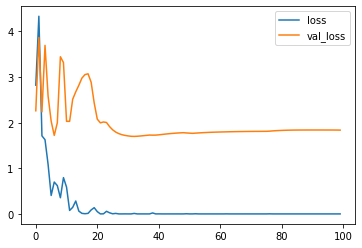

In [ ]:
loss[['loss', 'val_loss']].plot()

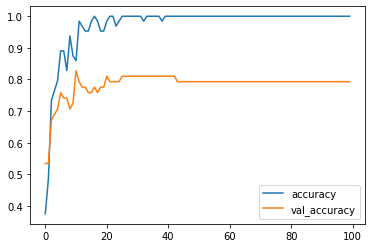

In [ ]:
loss[['accuracy', 'val_accuracy']].plot()

In [ ]:
y_pred = model.predict(test_set)
y_pred_cls=np.argmax(y_pred, axis = 1)
pred_df = pd.DataFrame({'Actual':test_set.labels, 'Prediction':y_pred_cls})
pred_df

,Actual,Prediction
0,0,2
1,0,1
2,0,2
3,0,1
4,0,2
5,0,2
6,0,2
7,0,1
8,0,2
9,1,1


In [ ]:
print(classification_report(pred_df['Actual'], pred_df['Prediction']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.53      0.57      0.55        30
           2       0.26      0.26      0.26        19

    accuracy                           0.38        58
   macro avg       0.26      0.28      0.27        58
weighted avg       0.36      0.38      0.37        58



In [ ]:
img_path = '/content/drive/MyDrive/Datasets/Car_data/Test/lamborghini/10.jpg'

In [ ]:
img = image.load_img(img_path, target_size = (224, 224))

In [ ]:
x = image.img_to_array(img)

In [ ]:
x = x/255
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

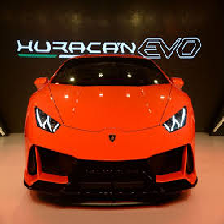

In [ ]:
img

In [ ]:
test_set.class_indices

{'audi': 0, 'lamborghini': 1, 'mercedes': 2}

In [ ]:
np.argmax(model.predict(img_data))

2